# Grouping districts of Lima Metropolitana into zones

In [1]:
import pandas as pd
import geopandas as gpd
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
districts_file = '../data/raw/GIS/03 Limite Distrital Abril 2015/DISTRITO_27_04_2015.shp'
districts_df = gpd.read_file(districts_file)

In [3]:
districts_df.head()

,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,LEY,23994,19/11/1984,CODO DEL POZUZO,3322.04,0.0,0.0,0.0,POLYGON ((-75.31797010604475 -9.29528868932607...
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,LEY,23994,19/11/1984,TOURNAVISTA,2228.46,0.0,0.0,0.0,POLYGON ((-75.20831425497452 -9.10175114728463...
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,LEY,30310,16/03/2015,ALEXANDER VON HUMBOLDT,190.80,0.0,0.0,0.0,POLYGON ((-74.95634510680588 -8.79147822674985...
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,LEY,23416,01/06/1982,SAN ALEJANDRO,998.93,0.0,0.0,0.0,POLYGON ((-75.10842584135128 -8.79990430480700...
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,LEY,30310,16/03/2015,MONTE ALEGRE,579.51,0.0,0.0,0.0,POLYGON ((-75.01588753932498 -8.44637001511011...


In [4]:
districts_lima_df = districts_df[(districts_df['IDPROV'] == '1501') | (districts_df['IDDPTO'] == '07')].reset_index()
districts_lima_df.head()

,index,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D,geometry
0,383,15,LIMA,1501,LIMA,150119,LURIN,LEY,S/N,02/01/1857,LURIN,180.26,0.86,0.0,0.0,POLYGON ((-76.93986323599995 -12.2477324799998...
1,431,15,LIMA,1501,LIMA,150102,ANCON,LEY,S/N,29/10/1874,ANCON,285.45,0.58,0.0,0.0,POLYGON ((-77.00476011945636 -11.6142695392331...
2,550,15,LIMA,1501,LIMA,150131,SAN ISIDRO,D.L.,7113,24/04/1931,SAN ISIDRO,11.10,0.00,0.0,0.0,POLYGON ((-77.02281236099998 -12.0908106049999...
3,551,15,LIMA,1501,LIMA,150120,MAGDALENA DEL MAR,LEY,4101,10/05/1920,MAGDALENA DEL MAR,3.61,0.00,0.0,0.0,POLYGON ((-77.06314261199998 -12.0865429789999...
4,553,15,LIMA,1501,LIMA,150130,SAN BORJA,LEY,23604,01/06/1983,SAN FRANCISCO DE BORJA,9.96,0.00,0.0,0.0,POLYGON ((-76.98169136199994 -12.0846288549999...


In [5]:
south = ['LURIN',
         'SANTA MARIA DEL MAR',
         'VILLA MARIA DEL TRIUNFO',
         'SAN JUAN DE MIRAFLORES',
         'VILLA EL SALVADOR',
         'PACHACAMAC']
north = ['ANCON',
         'SANTA ROSA',
         'CARABAYLLO',
         'INDEPENDENCIA',
         'SAN MARTIN DE PORRES',
         'PUENTE PIEDRA',
         'LOS OLIVOS',
         'COMAS']
east = ['SANTA ANITA',
        'CIENEGUILLA',
        'ATE',
        'LURIGANCHO',
        'CHACLACAYO']
high_income = ['SAN ISIDRO',
               'MAGDALENA DEL MAR',
               'SAN BORJA',
               'LINCE',
               'SANTIAGO DE SURCO',
               'PUEBLO LIBRE',
               'JESUS MARIA',
               'BARRANCO',
               'MIRAFLORES',
               'SURQUILLO',
               'SAN MIGUEL',
               'LA MOLINA',
               'SAN LUIS',
               'CHORRILLOS']
port = ['LA PUNTA',
        'LA PERLA',
        'BELLAVISTA',
        'CARMEN DE LA LEGUA REYNOSO',
        'CALLAO',
        'VENTANILLA',
        'MI PERU']
old_town = ['LA VICTORIA',
            'BREÑA',
            'LIMA',
            'EL AGUSTINO',
            'RIMAC']
sjl = ['SAN JUAN DE LURIGANCHO']
south_beach = ['PUCUSANA',
               'PUNTA HERMOSA',
               'PUNTA NEGRA',
               'SAN BARTOLO']

In [6]:
districts_lima_df['zone'] = ''
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(north)] = 'North Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(south)] = 'South Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(east)] = 'East Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(high_income)] = 'High income Lima'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(port)] = 'Port'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(old_town)] = 'Old town'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(sjl)] = 'San Juan de Lurigancho'
districts_lima_df['zone'].loc[districts_lima_df['NOMBDIST'].isin(south_beach)] = 'South beach'

/home/luis_eduardo/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
districts_lima_df = districts_lima_df.dissolve(by='zone')

In [8]:
districts_lima_df

,geometry,index,IDDPTO,NOMBDEP,IDPROV,NOMBPROV,IDDIST,NOMBDIST,DCTO,LEY,FECHA,NOM_CAP,SUP_CONTIN,SUP_INSULA,SUP_LACUST,SUP_INS_D
zone,,,,,,,,,,,,,,,,
East Lima,POLYGON ((-76.72233873599998 -11.9995939799999...,1242,15,LIMA,1501,LIMA,150137,SANTA ANITA,LEY,25116,25/10/1989,SANTA ANITA - LOS FICUS,10.69,0.00,0.0,0.0
High income Lima,POLYGON ((-76.98639873799993 -12.1674729449998...,550,15,LIMA,1501,LIMA,150131,SAN ISIDRO,D.L.,7113,24/04/1931,SAN ISIDRO,11.10,0.00,0.0,0.0
North Lima,POLYGON ((-77.03065423599998 -11.9963887299999...,431,15,LIMA,1501,LIMA,150102,ANCON,LEY,S/N,29/10/1874,ANCON,285.45,0.58,0.0,0.0
Old town,POLYGON ((-77.00315623599994 -12.0626172299999...,1229,15,LIMA,1501,LIMA,150115,LA VICTORIA,DEC.,S/N,02/02/1920,LA VICTORIA,8.74,0.00,0.0,0.0
Port,POLYGON ((-77.15641986099996 -12.0679199799999...,559,07,CALLAO,0701,CALLAO,070105,LA PUNTA,LEY,2141,06/10/1915,LA PUNTA,0.75,17.63,0.0,0.0
San Juan de Lurigancho,POLYGON ((-76.93137311099991 -11.9421739799999...,1308,15,LIMA,1501,LIMA,150132,SAN JUAN DE LURIGANCHO,LEY,16382,13/01/1967,SAN JUAN DE LURIGANCHO,131.25,0.00,0.0,0.0
South Lima,(POLYGON ((-76.78116986099997 -12.409171854999...,383,15,LIMA,1501,LIMA,150119,LURIN,LEY,S/N,02/01/1857,LURIN,180.26,0.86,0.0,0.0
South beach,(POLYGON ((-76.75330273599997 -12.428900354999...,1036,15,LIMA,1501,LIMA,150124,PUCUSANA,LEY,9782,22/01/1943,PUCUSANA,37.39,0.44,0.0,0.0


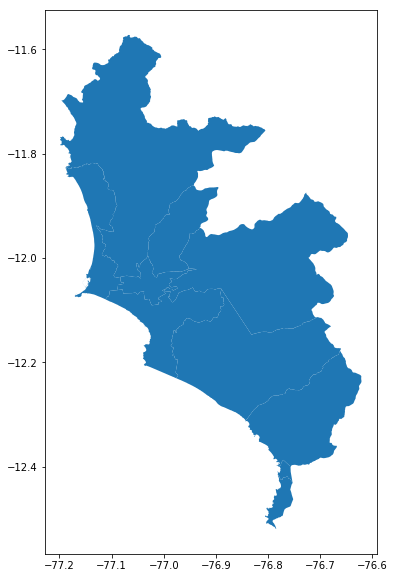

In [17]:
districts_lima_df.plot(figsize=(10, 10))

In [10]:
population_file = '../data/raw/poblacion distrital lima_censo2017.xlsX'
population_df = pd.read_excel(population_file,
                              skiprows = 8,
                              skipfooter = 10,
                              usecols = [1, 2])
population_df = population_df.rename(columns = {'Unnamed: 1': 'district', 'Unnamed: 2': 'population'})

In [11]:
population_df.head()

,district,population
0,AREA # 150101,"Lima, Lima, distrito: Lima"
1,NaN,NaN
2,P: Área concepto encuesta,Casos
3,Urbano encuesta,273142
4,Total,273142


In [12]:
population_df = population_df[(population_df['district'] == 'Total') | population_df['district'].str.contains('AREA #')].reset_index(drop = True)
population_df['population'] = population_df.loc[1:]['population'].reset_index(drop = True)
population_df = population_df[population_df['district'].str.contains('AREA #')].reset_index(drop = True)

In [13]:
population_df.head()

,district,population
0,AREA # 150101,273142
1,AREA # 150102,67232
2,AREA # 150103,624172
3,AREA # 150104,35379
4,AREA # 150105,90414


In [14]:
population_df['district'] = population_df['district'].apply(lambda x: re.sub('AREA # ', '', x))

In [15]:
population_df = population_df[population_df['district'].apply(lambda x: x[:4] == '1501')]
population_df['population'] = population_df['population'].astype('int32')

In [16]:
population_df

,district,population
0,150101,273142
1,150102,67232
2,150103,624171
3,150104,35378
4,150105,90413
5,150106,350988
6,150107,43400
7,150108,339701
8,150109,35883
9,150110,553536


In [40]:
callao_population_file = '../data/raw/poblacion distrital callao_censo2017.xlsX'
callao_population_df = pd.read_excel(callao_population_file,
                              skiprows = 8,
                              skipfooter = 9,
                              usecols = [1, 2])
callao_population_df = callao_population_df.rename(columns = {'Unnamed: 1': 'district', 'Unnamed: 2': 'population'})

In [42]:
callao_population_df = callao_population_df[(callao_population_df['district'] == 'Total') | callao_population_df['district'].str.contains('AREA #')].reset_index(drop = True)
callao_population_df['population'] = callao_population_df.loc[1:]['population'].reset_index(drop = True)
callao_population_df = callao_population_df[callao_population_df['district'].str.contains('AREA #')].reset_index(drop = True)

In [44]:
callao_population_df['district'] = callao_population_df['district'].apply(lambda x: re.sub('AREA # ', '', x))

In [46]:
callao_population_df['population'] = callao_population_df['population'].astype('int32')

In [47]:
callao_population_df

,district,population
0,070101,479418
1,070102,77679
2,070103,44376
3,070104,62387
4,070105,3926
5,070106,331118
6,070107,48047
